## Topic: Final Exam of Python

### Q.N_01: 

- Load the TrainingHours column into a NumPy array.

    - Convert to float datatype

    - Find mean & standard deviation

- Final output: Two numeric values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
# solution_01:

# load file

df = pd.read_csv('final-employee-ds.csv')

df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [3]:
# the TrainingHours column into a NumPy array

arr = np.array(df['TrainingHours'])

print('Numpy Array: ', arr)

print("Type : ", type(arr))

print("Data Type: ", arr.dtype)


Numpy Array:  [ 4 18 13 25  3 24 44 41 24 17 39  7 38 39 13 31 37 32 22 14 32 24 16 32
 46  1 13 39 39 38  5  5  2  6  7 41 14 46 28 32 29 38 26 35 28 37 32 36
 26 32  3 21  1  9  4  9 32 37 12 30 46 35 44 23 14 28  7  4 28 46  3 11
 44  1 26 30 35 35 25 42 26  4 19 10  9 39 37  5  7 22 46 25 45 42 11 25
 12 39 17 24]
Type :  <class 'numpy.ndarray'>
Data Type:  int64


In [4]:
# Convert to float datatype
arr = arr.astype(np.float64)

print("Data type: ", arr.dtype)

# another way:
# arr = np.array(df['TrainingHours'],dtype = np.float64)
# print("Data Type: ", arr.dtype)

Data type:  float64


In [5]:
# Find mean & standard deviation

# mean
mean_val = arr.mean()

# standard deviation
std_val = arr.std()

## Final output: Two numeric values

print("Mean Value: ", mean_val)
print(f"Standard deviation: {std_val:.2f}")


Mean Value:  24.19
Standard deviation: 13.84


In [ ]:
# another way:

mean_val = np.mean(arr)

std_val = np.std(arr)

print("Mean Value: ", mean_val)
print(f"Standard deviation: {std_val:.2f}")

Mean Value:  24.19
Standard deviation: 13.84


### Q.N_02:

- Handle missing values (if any):

    - Fill missing Salary with department-wise median

    - Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5
 

- Final output: One numeric value

In [70]:
df.head(5)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3
3,104,Employee_4,42,Male,Marketing,12,60056.0,48,76,2012-10-12,M,2,25,4
4,105,Employee_5,40,Female,Finance,19,85543.0,36,97,2014-12-30,XL,8,3,4


In [ ]:
# To see the how many Salary is absent
df[['Salary']].describe()

# here 4 values is absent

,Salary
count,96.000000
mean,98857.822917
std,33043.206562
min,43343.000000
25%,67584.750000
50%,100281.500000
75%,131696.750000
max,148940.000000


In [ ]:
# To see that the random Salary and Department 
df[['Salary', 'Department']].sample(10)

,Salary,Department
51,140793.0,HR
91,52161.0,Management
67,100890.0,Management
89,NaN,Finance
3,60056.0,Marketing
42,144185.0,Finance
58,67663.0,Marketing
75,44000.0,Marketing
56,56364.0,Finance
9,NaN,IT


#### Way_01: use apply() function

In [88]:
# group by Department wise

group_dep = df.groupby('Department')

In [89]:
# To see the each department median value
group_dep['Salary'].median()

Department
Finance        91991.0
HR             84078.0
IT            104272.5
Management    106801.0
Marketing     110766.5
Name: Salary, dtype: float64

In [90]:
# use apply function and fill NaN value with each department median value

def fill_na(salary):
    salary = salary.fillna(salary.median())

    return salary

group_dep['Salary'].apply(fill_na)


Department    
Finance     1      47805.0
            4      85543.0
            12     99638.0
            13    113666.0
            19     91991.0
                    ...   
Marketing   80    146306.0
            81    137856.0
            93    132658.0
            95     67350.0
            98     65351.0
Name: Salary, Length: 100, dtype: float64

#### Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

In [104]:
# Filter employees based on conditions
filtered_df = df[(df["ExperienceYears"] > 12) & (df["ProjectCount"] > 5)]

# Calculate total salary for filter employees
total_salary = filtered_df["Salary"].sum()

print("Total Salary:", total_salary)

Total Salary: 1789512.0


In [105]:
# without filter the total salary of employees
without_filter_total_salary = df['Salary'].sum()

print("Without Filter the Total Salary: ", without_filter_total_salary) 

Without Filter the Total Salary:  9490351.0


In [ ]:
# Numbers of Employees that 
exp = (df['ExperienceYears']>12).sum()
pj_count = ((df['ProjectCount']>5)).sum()


both_exp_pj = ((exp) & (pj_count)).sum()

print(f"Total Employees that have experience Greater than: {exp} years")
print(f"Total Employees that have Project count Greater than: {pj_count}")
print(f"Total Employees that have Both: {both_exp_pj}")


Total Employees that have experience Greater than: 40 years
Total Employees that have Project count Greater than: 45
Total Employees that have Both: 40


#### Another way to solve the Question -2:

In [ ]:
# mean_val = group_dep['Salary'].mean()

# mean_val

Department
Finance        92511.692308
HR             91115.869565
IT            102537.500000
Management    101942.100000
Marketing     104443.250000
Name: Salary, dtype: float64

In [ ]:
# mean_val['IT']

np.float64(102537.5)

In [ ]:
# df.head(1)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1


In [ ]:
# fill with only IT mean value
# df['Salary'].fillna(mean_val["IT"])

0     86175.0
1     47805.0
2     45237.0
3     60056.0
4     85543.0
5     96556.0
6     43343.0
7     53500.0
8     93222.0
9    102537.5
Name: Salary, dtype: float64

#### Question_02: Another EXamples

In [ ]:
# import pandas as pd
# import numpy as np

# # Create DataFrame
# New_df = pd.DataFrame({
#     "Name": ["Raihan", "Mim", "Arafat", "Sumaiya", "Tanim", "Rafi"],
#     "Department": ["IT", "HR", "Finance", "IT", "HR", "Finance"],
#     "Salary": [85000, np.nan, 75000, np.nan, 60000, 72000],
#     "ExperienceYears": [14, 10, 15, 13, 8, 18],
#     "ProjectCount": [6, 4, 8, 7, 3, 9]
# })
# #

# df

,Name,Department,Salary,ExperienceYears,ProjectCount
0,Raihan,IT,85000.0,14,6
1,Mim,HR,NaN,10,4
2,Arafat,Finance,75000.0,15,8
3,Sumaiya,IT,NaN,13,7
4,Tanim,HR,60000.0,8,3
5,Rafi,Finance,72000.0,18,9


In [ ]:
# group = df.groupby("Department")

In [ ]:
# group['Salary'].median()

Department
Finance    73500.0
HR         60000.0
IT         85000.0
Name: Salary, dtype: float64

In [ ]:
# # use apply function
# def fill_fun(salary):
#     # print(salary)
#     # print(type(salary))

#     salary = salary.fillna(salary.median())

#     return salary

# group['Salary'].apply(fill_fun)



Department   
Finance     2    75000.0
            5    72000.0
HR          1    60000.0
            4    60000.0
IT          0    85000.0
            3    85000.0
Name: Salary, dtype: float64

In [ ]:
# df['Salary'] = df.groupby('Department')['Salary'].apply(lambda x: x.fillna(x.median()))

                       

- Q.N_2_02:
    <!-- - Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5 -->

In [ ]:
# df.head(3)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3


In [ ]:
# Total sum
# df['Salary'].sum()

np.float64(9490351.0)

In [ ]:
# #  employees with ExperienceYears > 12 and ProjectCount > 5

# sum_salary = df[
#     (df['ExperienceYears'] > 12) &
#     (df['ProjectCount'] > 5)
# ]

# sum_val = sum_salary['Salary'].sum()

# print("Total Salary with Condition: ", sum_val)

Total Salary with Condition:  1789512.0


### Q.n_03:

- Filter employees who:

    - Department = "IT" or "Finance"

    - Age between 30–45

    - PerformanceScore > 88

    - Sort by Salary descending
 

- Final output: Table with Name, Department, Salary, PerformanceScore

#### Department = "IT" or "Finance"

In [151]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [ ]:
# Filter with employee based on Department = "IT" or "Finance"

emp_dep = df.loc[
    ((df['Department'] == 'IT') |
    (df['Department'] == 'Finance')),

    ['Name', 'Department', 'Salary', 'PerformanceScore']
]
emp_dep.head()

,Name,Department,Salary,PerformanceScore
0,Employee_1,IT,86175.0,71
1,Employee_2,Finance,47805.0,68
4,Employee_5,Finance,85543.0,97
6,Employee_7,IT,43343.0,72
8,Employee_9,IT,93222.0,68


#### Age between 30–45

In [167]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [182]:
# Filter with employee based on Age between 30–45 (Exclusive)

emp_age_30_40 = df.loc[
   (( df['Age'] > 30 )& 
   ( df['Age'] < 45)),

   ['Name', 'Department', 'Salary', 'PerformanceScore']
#    ['Name', 'Department', 'Salary', 'PerformanceScore', 'Age']

]

emp_age_30_40.head()

,Name,Department,Salary,PerformanceScore
1,Employee_2,Finance,47805.0,68
3,Employee_4,Marketing,60056.0,76
4,Employee_5,Finance,85543.0,97
5,Employee_6,HR,96556.0,66
6,Employee_7,IT,43343.0,72


In [181]:
len(emp_age_30_40)

33

In [186]:
# Filter with employee based on Age between 30–45 (inclusive)
emp_age = df.loc[
    df['Age'].between(30,45), 
    ['Name', 'Department', 'Salary', 'PerformanceScore']
    
]

emp_age.head()

,Name,Department,Salary,PerformanceScore
1,Employee_2,Finance,47805.0,68
3,Employee_4,Marketing,60056.0,76
4,Employee_5,Finance,85543.0,97
5,Employee_6,HR,96556.0,66
6,Employee_7,IT,43343.0,72


#### PerformanceScore > 88

In [ ]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [190]:
# Filter with employee based on PerformanceScore > 88

performance = df.loc[
    df['PerformanceScore'] > 88,
    ['Name', 'Department', 'Salary', 'PerformanceScore']
]

performance.head(5)

,Name,Department,Salary,PerformanceScore
4,Employee_5,Finance,85543.0,97
7,Employee_8,Management,53500.0,99
13,Employee_14,Finance,113666.0,96
14,Employee_15,Marketing,125067.0,97
23,Employee_24,Marketing,94340.0,95


#### Sort by Salary descending

In [191]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [ ]:
# Filter with employee based on Sort by Salary descending

df['Salary'].sort_values(ascending = False).head(3)


87    148940.0
33    148761.0
80    146306.0
Name: Salary, dtype: float64

In [ ]:
# Filter with employee based on Sort by Salary descending

new_df = df.sort_values(['Salary'], ascending = 0)

new_df.loc[:, ['Name', 'Department', 'Salary', 'PerformanceScore']].head(10)

,Name,Department,Salary,PerformanceScore
87,Employee_88,Finance,148940.0,68
33,Employee_34,Marketing,148761.0,62
80,Employee_81,Marketing,146306.0,67
42,Employee_43,Finance,144185.0,72
61,Employee_62,Marketing,144182.0,90
79,Employee_80,IT,143691.0,85
40,Employee_41,Marketing,142756.0,60
77,Employee_78,Marketing,141042.0,87
51,Employee_52,HR,140793.0,80
94,Employee_95,IT,140386.0,94


### Q.n_4:

- Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

- Filter top 5 employees by SalaryPerHour
    - Final output: Table(5 Rows) with Name, SalaryPerHour

#### Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

In [210]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4


In [ ]:
df['SalaryPerHour'] = df['Salary']/((df['WorkHoursPerWeek'] * 4))

df.head(3)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating,SalaryPerHour
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1,489.630682
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4,271.619318
2,103,Employee_3,29,Male,Marketing,16,45237.0,44,69,2012-03-08,S,6,13,3,257.028409


#### Filter top 5 employees by SalaryPerHour

In [224]:
sort_df = df.sort_values('SalaryPerHour', ascending = False).head(5)

sort_df.head(5)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating,SalaryPerHour
46,147,Employee_47,57,Female,Marketing,1,137379.0,35,97,2018-04-26,L,2,32,1,981.278571
27,128,Employee_28,24,Male,Management,5,135981.0,35,98,2021-05-09,M,9,39,1,971.292857
31,132,Employee_32,30,Male,IT,1,135435.0,35,78,2014-12-29,L,8,5,4,967.392857
79,180,Employee_80,32,Female,IT,5,143691.0,38,85,2020-06-15,L,6,42,5,945.335526
80,181,Employee_81,38,Female,Marketing,7,146306.0,39,67,2021-05-01,S,7,26,5,937.858974


#### Final output: Table(5 Rows) with Name, SalaryPerHour

In [227]:
sort_df.loc[:, ['Name', 'SalaryPerHour']]

,Name,SalaryPerHour
46,Employee_47,981.278571
27,Employee_28,971.292857
31,Employee_32,967.392857
79,Employee_80,945.335526
80,Employee_81,937.858974


### Q.N_5:

- Create a bar chart showing the count of employees in each Department, separated by Gender. You can 
solve the question with any of the package (Matplotlib , Seaborn , Plotly )

- Dataset Columns Used:
    - Department → Categorical variable (IT, Finance, HR, Marketing, Management)


- Gender → Categorical variable (Male, Female)

- Expected Output
    - A bar chart where:
    - x-axis → Department
    - y-axis → Number of employees
    - Each bar split into Male and Female segments
    - Colors differentiate gender


In [137]:
# import seaborn
import seaborn as sns

In [ ]:

sns.countplot(data=df, x='Department', hue='Gender', edgecolor='black')

plt.title("Employee Count by Department and Gender")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title="Gender")

plt.show()


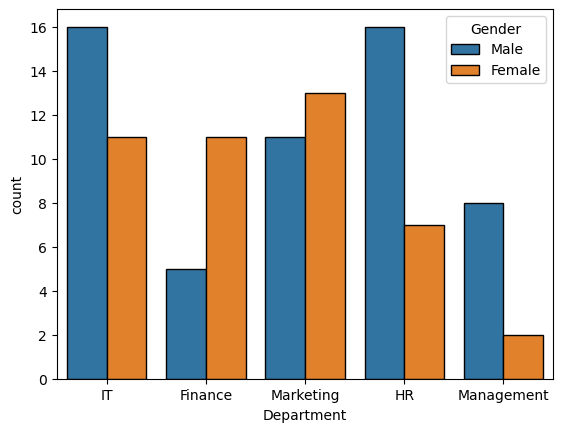

In [270]:
sns.countplot(
    data = df,
    x = 'Department',
    hue = 'Gender',
    edgecolor = 'black'
    # color = ['red','green']

)

plt.show()

In [268]:
df.head(2)

,EmployeeID,Name,Age,Gender,Department,ExperienceYears,Salary,WorkHoursPerWeek,PerformanceScore,JoinDate,Tshirt_size,ProjectCount,TrainingHours,DepartmentRating,SalaryPerHour
0,101,Employee_1,50,Male,IT,17,86175.0,44,71,2010-01-10,L,2,4,1,489.630682
1,102,Employee_2,36,Male,Finance,1,47805.0,44,68,2017-11-11,S,4,18,4,271.619318


In [127]:
import plotly.express as px


In [ ]:
sns.countplot(
    data = df,
    x = 'Department',
    hue = 'Gender',
    edgecolor = 'black'
    # color = ['red','green']

)



In [ ]:
df_long = df.melt(id_vars='Department', value_vars=['Male', 'Female'],
                  var_name='Gender', value_name='Count')

fig = px.bar(df_long, x='Department', y='Count', color='Gender',
             barmode='group', title='Student Distribution by Gender')
fig.show()

In [ ]:
# Sample Data
data = {
    'Department': ['CSE', 'EEE', 'BBA', 'ENG', 'LAW'],
    'Students': [120, 100, 80, 60, 40]
}

fig = px.bar(data, x='Department', y='Students', title='Student Count by Department')
fig.show()


In [158]:
import pandas as pd

# Sample data
new_df = pd.DataFrame({
    'Department': ['CSE', 'EEE', 'BBA', 'ENG', 'LAW'],
    'Male': [70, 50, 40, 30, 20],
    'Female': [50, 50, 40, 30, 20]
})

new_df.head(3)

group_d = new_df.groupby('Department').size()

fig = px.bar(new_df, x='group_d.index', y='group_d.values', color='Gender',
             barmode='group', title='Student Distribution by Gender')
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Department', 'Male', 'Female'] but received: group_d.index

In [ ]:
group_d = df.groupby('Department').size()

fig = px.bar(new_df, x='group_d.index', y='group_d.values', color='Gender',
             barmode='group', title='Student Distribution by Gender')
fig.show()

Department
BBA    1
CSE    1
EEE    1
ENG    1
LAW    1
dtype: int64

array([1, 1, 1, 1, 1])

Index(['BBA', 'CSE', 'EEE', 'ENG', 'LAW'], dtype='object', name='Department')

ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['Department', 'Male', 'Female'] but received: Gender

In [ ]:
# Melt to long format
df_long = df.melt(id_vars='Department', value_vars=['Male', 'Female'],
                  var_name='Gender', value_name='Count')

fig = px.bar(df_long, x='Department', y='Count', color='Gender',
             barmode='group', title='Student Distribution by Gender')
fig.show()


fig = px.bar(data, x='Department', y='Students', title='Student Count by Department')
fig.show()

In [136]:
# Melt to long format
# df_long = df.melt(id_vars='Department', value_vars=['Male', 'Female'],
#                   var_name='Gender', value_name='Count')

fig = px.bar(df, x='Department', y='Count', color='Gender',
             barmode='group', title='Student Distribution by Gender')
fig.show()


# fig = px.bar(data, x='Department', y='Students', title='Student Count by Department')
# fig.show()

ValueError: Value of 'y' is not the name of a column in 'data_frame'. Expected one of ['Department', 'Male', 'Female'] but received: Count

In [160]:
import pandas as pd

df = pd.DataFrame({
    'Department': ['IT', 'Finance', 'HR', 'Marketing', 'Management', 'IT', 'Finance', 'HR', 'Marketing', 'Management'],
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female']
})




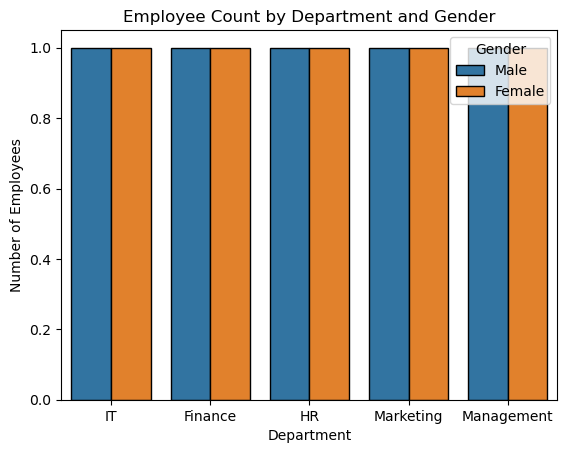

In [168]:

sns.countplot(data=df, x='Department', hue='Gender', edgecolor='black')

plt.title("Employee Count by Department and Gender")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title="Gender")

plt.show()
